In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, \
GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.svm import LinearSVR


In [25]:
df=pd.read_csv('possum.csv')

In [26]:
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [27]:
df.shape

(104, 14)

In [28]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [29]:
q=df['age'].mode()

In [30]:
q

0    3.0
Name: age, dtype: float64

In [31]:
df['age']=df['age'].fillna(3)

In [32]:
df.isnull().mean()*100

case        0.000000
site        0.000000
Pop         0.000000
sex         0.000000
age         0.000000
hdlngth     0.000000
skullw      0.000000
totlngth    0.000000
taill       0.000000
footlgth    0.961538
earconch    0.000000
eye         0.000000
chest       0.000000
belly       0.000000
dtype: float64

In [33]:
r=df['footlgth'].mode()

In [34]:
r

0    73.2
Name: footlgth, dtype: float64

In [35]:
df['footlgth'].fillna(73.2,inplace=True)

In [36]:
df.isnull().mean()*100

case        0.0
site        0.0
Pop         0.0
sex         0.0
age         0.0
hdlngth     0.0
skullw      0.0
totlngth    0.0
taill       0.0
footlgth    0.0
earconch    0.0
eye         0.0
chest       0.0
belly       0.0
dtype: float64

In [37]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.817308,92.602885,56.883654,87.088462,37.009615,68.504808,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.894112,3.573349,3.113426,4.310549,1.959518,4.398552,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.750000,90.675000,54.975000,84.000000,35.875000,64.650000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.100000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.550000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [39]:
df=df.drop_duplicates()

In [40]:
df.nunique()

case        104
site          7
Pop           2
sex           2
age           9
hdlngth      71
skullw       64
totlngth     34
taill        19
footlgth     75
earconch     69
eye          35
chest        19
belly        24
dtype: int64

In [41]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [42]:
#sns.pairplot(df,hue='Pop')

In [43]:
df['age'].max()

9.0

### Univariate analysis;

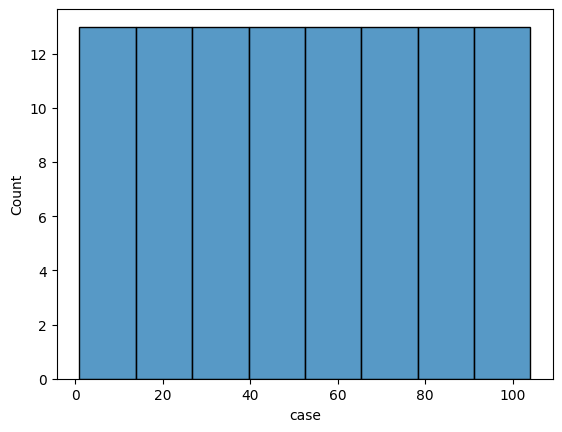

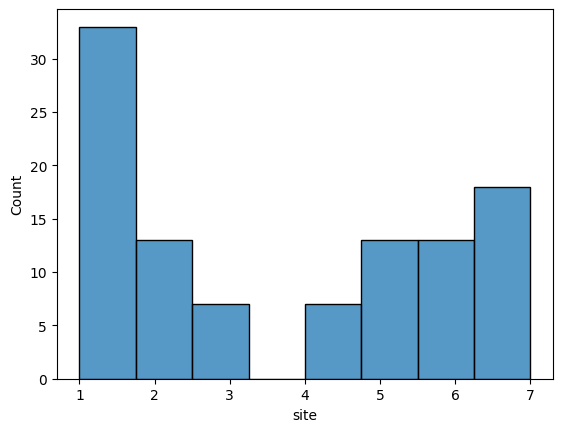

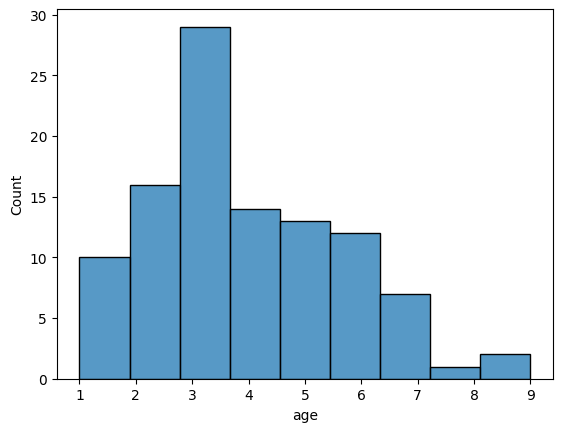

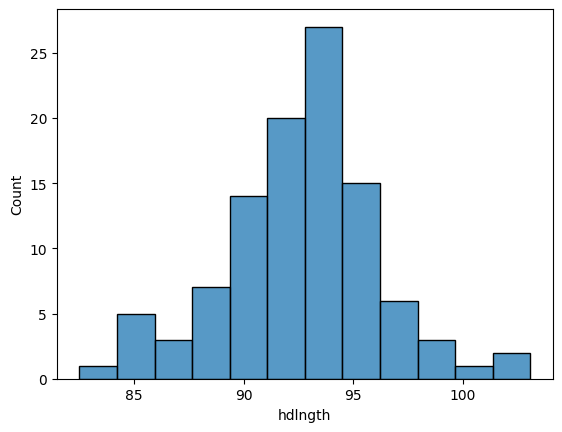

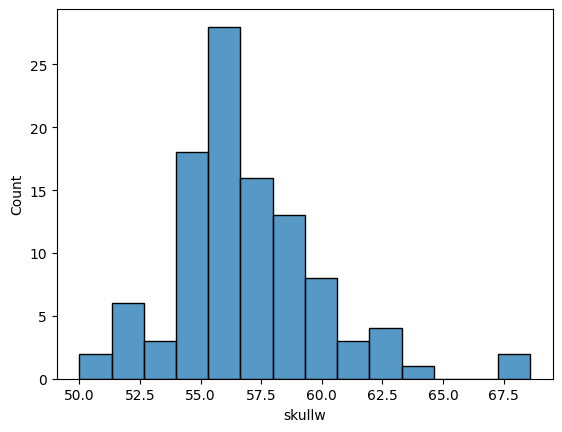

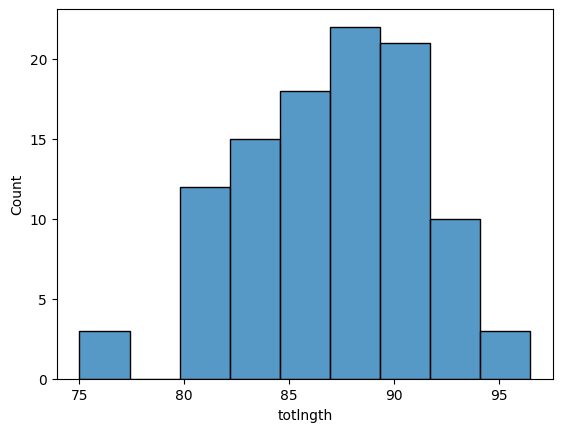

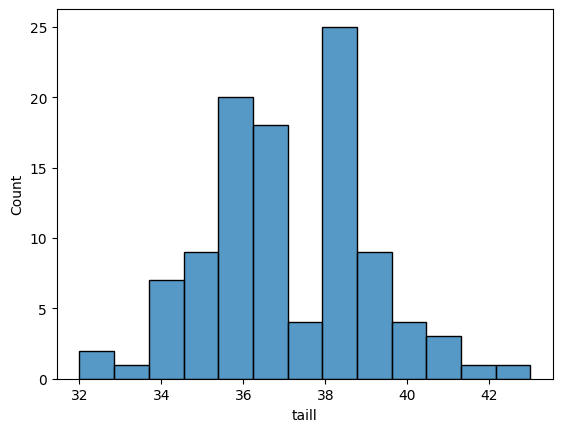

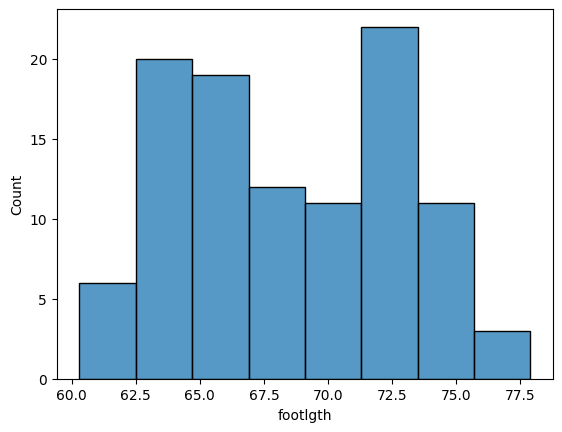

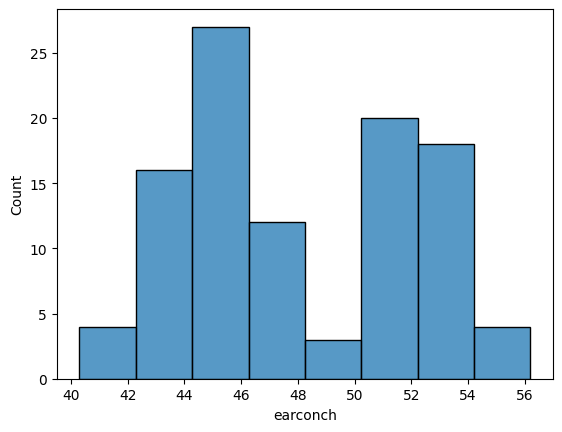

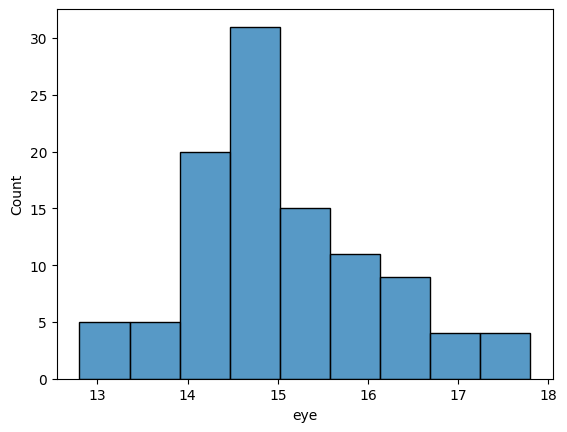

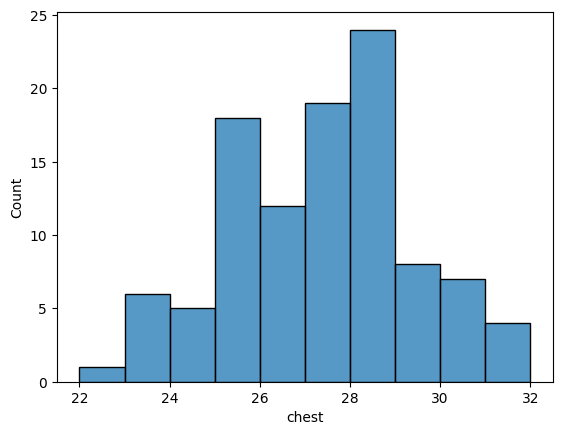

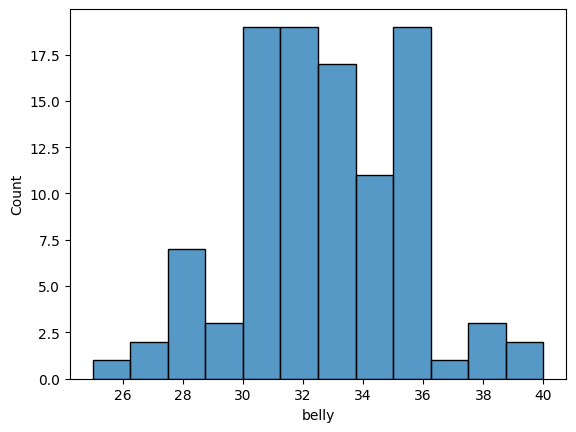

In [44]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.histplot(x =df[i])
        plt.show()

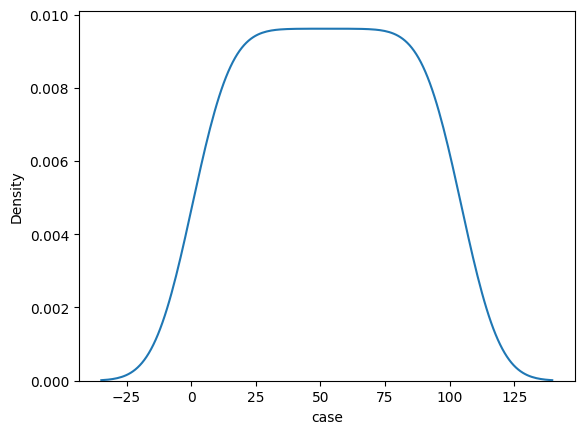

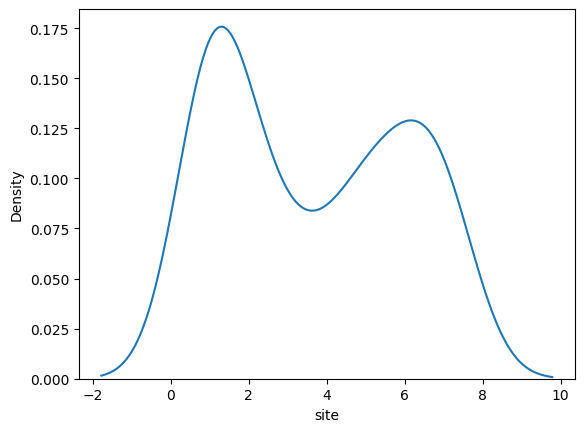

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

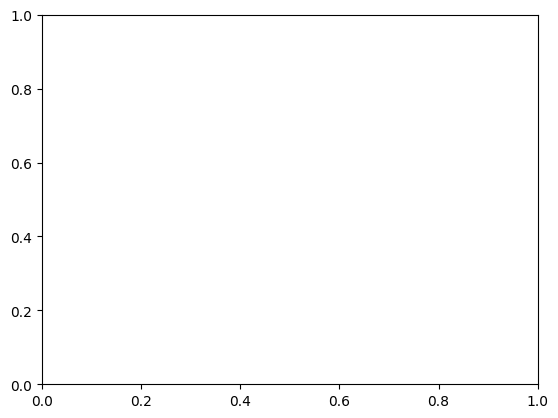

In [45]:
for i in df.columns:
    if df[i].dtypes != "objects":
        sns.kdeplot(x =df[i] )
        plt.show()

In [ ]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.boxplot(y = df[i])
        plt.show();

### Setting the outer limits

In [48]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL =Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [49]:
for i in df.columns:
    if df[i].dtypes != "object":
        UL,LL = outlier_limit(df[i])
        df[i] =np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

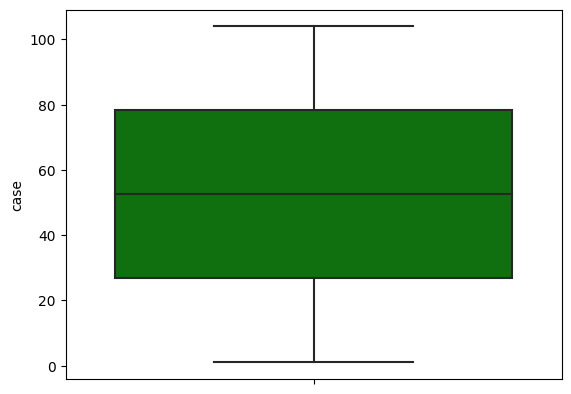

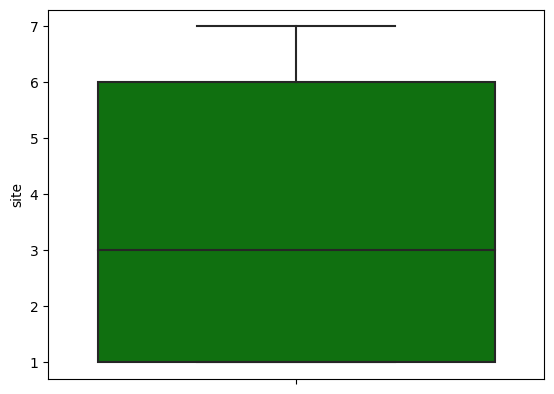

TypeError: Vertical orientation requires numeric `y` variable.

In [50]:
for i in df.columns:
    if df[i].dtypes != "objects":
        sns.boxplot(y =df[i], color="green")
        plt.show()

In [51]:
df.dropna(inplace=True)
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1.0,1.0,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2.0,1.0,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3.0,1.0,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4.0,1.0,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5.0,1.0,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100.0,7.0,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101.0,7.0,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102.0,7.0,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103.0,7.0,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


### Label encoding the categorical columns

In [52]:
le =LabelEncoder()

In [53]:
df['Pop']= le.fit_transform(df['Pop'])

In [54]:
df['sex']= le.fit_transform(df['sex'])

### Checking the correlation with the target 'footlgth'

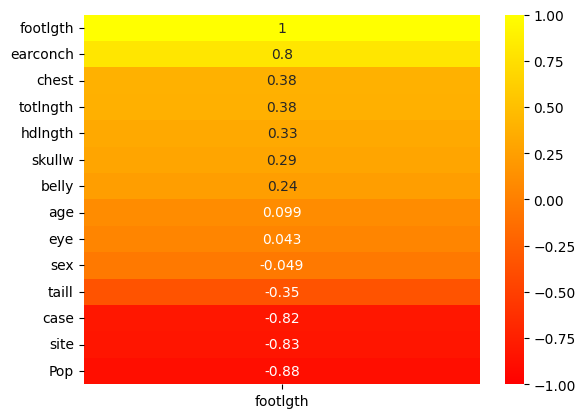

In [55]:
sns.heatmap(df.corr()[["footlgth"]].sort_values(by="footlgth",ascending=False),  vmin=-1,vmax=1,annot=True,cmap="autumn");

### Lets take only the columns with good correlation with the target

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      86 non-null     float64
 1   site      86 non-null     float64
 2   Pop       86 non-null     int32  
 3   sex       86 non-null     int32  
 4   age       86 non-null     float64
 5   hdlngth   86 non-null     float64
 6   skullw    86 non-null     float64
 7   totlngth  86 non-null     float64
 8   taill     86 non-null     float64
 9   footlgth  86 non-null     float64
 10  earconch  86 non-null     float64
 11  eye       86 non-null     float64
 12  chest     86 non-null     float64
 13  belly     86 non-null     float64
dtypes: float64(12), int32(2)
memory usage: 9.4 KB


In [57]:
x= df[['hdlngth','skullw','totlngth','earconch','chest','belly']].values

In [58]:
y=df[['footlgth']].values

### Feature Scaling

In [59]:
sc= StandardScaler()

In [60]:
x= sc.fit_transform(x)

### splitting the data into training and testing data set

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Model building

In [62]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    "LinearSVR":LinearSVR(),
    "Lasso":Lasso(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    "BaggingRegressor":ExtraTreesRegressor(),
    "ExtraTreeRegressor":HistGradientBoostingRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(random_state=0)
    
}

In [63]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print('model trained with{}'.format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score= model.score(x_test,y_test)*100
    score =r2_score(y_test,model.predict(x_test))*100
    mae = mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score",score)
    print("training_score:",training_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test",rmse)
    print("*"*100)

model trained withLinearRegression
r2score 66.24812602382632
training_score: 71.35430157812227
testing_score: 66.24812602382632
mae: 1.6043929235086125
mse: 4.456549520486725
rmse_test 2.111054125428035
****************************************************************************************************
model trained withRidge
r2score 66.70882732219077
training_score: 71.33413668020819
testing_score: 66.70882732219077
mae: 1.5883101597596803
mse: 4.395719175132771
rmse_test 2.096597046438054
****************************************************************************************************
model trained withLinearSVR
r2score -328.55392118341945
training_score: -137.79998022387298
testing_score: -328.55392118341945
mae: 6.833006664152429
mse: 56.585651312306425
rmse_test 7.52234347210405
****************************************************************************************************
model trained withLasso
r2score 59.944604054254434
training_score: 60.83056452872141
testing_score: 5